# Вітаю на фінальному проєкті!
Протягом курсу ми навчились завантажувати дані в Python, трансформувати їх, чистити, агрегувати, знаходити з допомогою даних відповіді на наші питання. 
Задача фінального проєкту - продемонструвати той рівень роботи з даними, на якому ви є зараз. 

Цей ноутбук буде присвячений аналізу даних з файла `Grocery DataBase.xlsx`, який є в папці `Дані` на Диску. Так, це Excel файл, але ми можемо дуже просто завантажувати дані з нього у Python. Покажу пару команд для роботи з Excel файлом.

Для початку встановимо бібліотеку, яка потрібна для роботи з Excel файлами з pandas. Можна встановити тут, або в терміналі, але якщо Ви встановлюєте в терміналі, то після того треба перезапустити ядро (Kernel) ноутбуку, аби бібліотека точно підтягнулась. Іноді підтягується і без того, але це на випадок, що робити, якщо компілятор каже, що її не бачить.

In [15]:
!pip install openpyxl

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats as st
from scipy.stats import norm
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import ztest  
from scipy.stats import ttest_1samp

Ось так можемо переглянути, які є листки в Excel файлі:

In [17]:
# замініть на шлях до файлу на своєму комп`ютері
path_to_file = '../Downloads/Grocery Database-1.xlsx'

In [18]:
xl = pd.ExcelFile(path_to_file)
xl


А так можемо зчитати конкретний листок:

In [19]:
xl.parse('Fact Summary')

,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/1...
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


Читати дані можна і з Pandas, але тут немає можливості переглянути наявні листки, а також довше відбувається читання даних.

In [20]:
df = pd.read_excel(path_to_file)

В файлі ви знайдете самі дані та опис колонок.   

**Задача**: Уявіть, що Вам дали цей набір даних з питанням "Що корисного ми можемо з них взяти для розвитку нашого бізнесу?". То Вам необхідно розказати бізнесу історію про ці дані у форматі
1. питання, яке Вас як робітника цього бізнесу, який дуже вболіває за його успіх, цікавить щодо цих даних
2. код для відповіді на це питання
3. висновки, які я можу зробити з огляду на результат виконання коду: які рішення ми можемо прийняти щодо подальших кроків в аналізі або які рекомендації Ви б дали бізнесу виходячи з результатів.

**Необхідно** поставити до даних _мінімум_ 10 бізнес-питань, при цьому зробивши   
- початковий аналіз даних: їх розмір, структура, наявність пропущених значень та що з ними зробити, зміна типів даних там, де це доречно зробити (наприклад, якщо колонка завантажилась як тип string, а з опису видно, що там має бути float) - ця частина не входить у бізнес-питання, але є необхідною при аналізі даних.  
- _мінімум_ 1 зведену таблицю або її аналог
- _мінімум_ 5 візуалізацій, 3 з яких мають різний тип (наприклад, scatter plot, line plot, pair plot)

В даному мінімум-наборі немає вимоги на використання SQL та тестування статистичних гіпотез. Але якщо Вам хочеться потренуватись, то Ви можете це зробити скориставшись pandasql, а також перевірити, чи є відмінність між двома групами у якомусь показнику з допомогою тестування статистичних гіпотез. Останнє найбільш доречно, якщо, наприклад, ми беремо чоловіків і жінок, бачимо що у них доволі схожі середні чеки, але наче відрізняються. Аби зрозуміти, чи різниця статистично значущою, можна це перевірити з допомогою тестування стат. гіпотез.

Питанням може бути як "Яка є кількість унікальних чеків в цьому наборі даних?" так і щось значно складніше. Якщо у Вас складне питання, і аби відповісти на нього Ви мали відповісти на 3 менших питання (зробити якісь трансформації над даними, подивитись щось), то це рахується як 3 питання з 10 необхідних у завданні. Звісно ж Ви можете зробити більше за встановлений мінімум - все буде перевірено :)

Тут є великий простір для Вашої фантазії. **Тому рекомендація:** виділіть на це завданні певну кількість годин (наприклад, середнє значення по тому, скільки у Вас займало виконання домашніх завдань в курсі, але я рекомендую не менше 2х годин роботи)
і поставте собі за ціль всю роботу вмістити в цю кількість годин.
Це дозволить Вам управляти своїм часом, пріоритизувати питання, які ставите до даних. І так часто є в роботі: коли ми не знаємо, що ми шукаємо, ми ставимо обмеження по часу (задача типу spike) і робимо все, що встигнемо, за цей час.

По закінченню - завантажуємо ноутбук на git і додаємо посилання в здачу роботи в Eduflow. 
До речі, з часом, вам може захотітись доповнити цей ноутбук, коли арсенал ваших навичок по роботі з даними розшириться. І це буде чудова ідея!

**Успіхів!**

# Частина 1. Первинний аналіз

1.Визначаємо розміри датафрейму та виводимо 10 рядків для візуального ознайомлення

In [21]:
rows, cols = df.shape
print(f"Набір даних містить {rows} рядки та {cols} стовпці.")
display(df[0:10])

Набір даних містить 50447 рядки та 32 стовпці.


,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930
5,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,3,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.33720,0.4215,2.05130
6,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,3,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.31160,0.4920,2.47640
7,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,4,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.35625,0.5625,2.83125
8,GIJ00004,2016-01-03,2016,1,20:52:55.730000,9800896004,MIDID0004,0,20,Female,...,0.1,23.31714,Cash,BDO Unibank,0.148,0.15,0.702,0.86432,0.8760,4.09968
9,GIJ00004,2016-01-03,2016,1,20:52:55.730000,9800896004,MIDID0004,1,20,Female,...,0.1,23.31714,Cash,BDO Unibank,0.076,0.15,0.774,0.55480,1.0950,5.65020


2.Визначаємо типи даних 

In [22]:
df.dtypes

Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

3.Перевіримо, чи є пусті значення

In [23]:

df.isna().sum().sort_values(ascending=False)

Receipt Number         0
Date                   0
Operating Cost         0
Profit Margin          0
% Product Cost         0
% Operating Cost       0
% Profit Margin        0
Bank Name              0
Payment Mode           0
Gross Bill Amount      0
GST                    0
Net Bill Amount        0
Amount                 0
DISC                   0
QTY                    0
Price                  0
Description            0
Brand                  0
Items                  0
Sub_Category           0
Category               0
Country                0
City                   0
Gender                 0
Age                    0
Loyalty Card Points    0
Membership ID          0
Mobile Number          0
Time                   0
Month                  0
Year                   0
Product Cost           0
dtype: int64

4.Перейменовуємо колонки, замінивши пробіл на  "_"

In [24]:
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['Receipt_Number', 'Date', 'Year', 'Month', 'Time', 'Mobile_Number',
       'Membership_ID', 'Loyalty_Card_Points', 'Age', 'Gender', 'City',
       'Country', 'Category', 'Sub_Category', 'Items', 'Brand', 'Description',
       'Price', 'QTY', 'DISC', 'Amount', 'Net_Bill_Amount', 'GST',
       'Gross_Bill_Amount', 'Payment_Mode', 'Bank_Name', '%_Profit_Margin',
       '%_Operating_Cost', '%_Product_Cost', 'Profit_Margin', 'Operating_Cost',
       'Product_Cost'],
      dtype='object')

5.Визначаємо кількість унікальних чеків в датафреймі 

In [25]:
df.Receipt_Number.nunique()

13048

6.Для більшості чеків значення поля "Net_Bill_Amount" вираховується за формулою: "Price*QTY*(1-DISC)". Але з чеку номер GIJ0003 бачимо, що є виключення. Необхідно перевірити, чи велика кількість таких виключень і потенційно некоректних даних. Додаємо нову колонку "Bill Check". В цій колонці вираховуємо значення "Net_Bill_Amount" за формулою для подальшої звірки з реальним значенням "Net_Bill_Amount" 

In [26]:
df = df.assign(Bill_Check = df['Price'] * df['QTY']*(1-df['DISC']))
display(df[0:10])

,Receipt_Number,Date,Year,Month,Time,Mobile_Number,Membership_ID,Loyalty_Card_Points,Age,Gender,...,Gross_Bill_Amount,Payment_Mode,Bank_Name,%_Profit_Margin,%_Operating_Cost,%_Product_Cost,Profit_Margin,Operating_Cost,Product_Cost,Bill_Check
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200,12.1128
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240,22.9680
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693,13.1769
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760,3.4848
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930,4.3659
5,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,3,16,Female,...,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.33720,0.4215,2.05130,2.7819
6,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,3,16,Female,...,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.31160,0.4920,2.47640,3.2472
7,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,4,16,Female,...,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.35625,0.5625,2.83125,3.7125
8,GIJ00004,2016-01-03,2016,1,20:52:55.730000,9800896004,MIDID0004,0,20,Female,...,23.31714,Cash,BDO Unibank,0.148,0.15,0.702,0.86432,0.8760,4.09968,5.7232
9,GIJ00004,2016-01-03,2016,1,20:52:55.730000,9800896004,MIDID0004,1,20,Female,...,23.31714,Cash,BDO Unibank,0.076,0.15,0.774,0.55480,1.0950,5.65020,7.1540


In [27]:
#Визначаємо суми чеків, беремо реальне значення з таблиці та очікуване згідно формули
real_result = df.groupby('Receipt_Number')['Net_Bill_Amount'].mean()  #використовую mean(), так як всі значення в рамках одного чеку в цій колонці однакові
estimated_result = df.groupby('Receipt_Number')['Bill_Check'].sum()

In [28]:
#поєднуємо колонки
results = pd.concat([real_result, estimated_result], axis = 1)
#створюємо умову для порівняння колонок
mask = np.isclose(results['Net_Bill_Amount'], results['Bill_Check'])
#Виводимо рядки, де real_result не дорівнює estimated_result
problem_df = df.loc[~df['Receipt_Number'].isin(results[mask].index)]
print("Кількість нестандартних унікальних чеків:" , problem_df['Receipt_Number'].nunique())

Кількість нестандартних унікальних чеків: 2823


In [29]:
#визначаємо, скільки нестандартних чеків у відсотковому співвідношенні
percent_of_unusual = (problem_df['Receipt_Number'].nunique()/df.Receipt_Number.nunique())*100
percent_of_unusual = round(percent_of_unusual, 2)
print(f"Кількість нестандартних чеків складає {percent_of_unusual} %")

Кількість нестандартних чеків складає 21.64 %


7.Спробуємо знайти закономірність появи нестандарних чеків. Зробимо перевірку, можливо всі ці чеки 
а) мають спільну країну (мала місце якась регіональна знижка)
б) товари одного бренду (промоакція бренду)
в) товари однієї категорії або підкатегорії 

In [60]:
display(problem_df.groupby('Receipt_Number')['Country'].unique().value_counts())
display(problem_df.groupby('Receipt_Number')['Brand'].unique().value_counts())
display(problem_df.groupby('Receipt_Number')['Category'].unique().value_counts())
#як бачимо, чітких закономірностей, які б впливали на розрахунок Net_Bill_Amount немає 

[Singapore]      1030
[Philippines]     696
[Malaysia]        564
[Indonesia]       533
Name: Country, dtype: int64

[Cascadiam Farm, Organic 4 Life, LIVEWELL, ThyGrace, YUVVO]    1
[Nature's Gift, Nutro, Alpo, PEDIGREE]                         1
[Yakult, BonJour, Anchor]                                      1
[Yakult, BonJour, Anchor]                                      1
[Ashai, Sainbury]                                              1
                                                              ..
[Ashai, Sainbury]                                              1
[Millenium Horse, Biogreen, Liang Teck]                        1
[Millenium Horse, Biogreen, Liang Teck]                        1
[Cascadiam Farm, Organic 4 Life, LIVEWELL, ThyGrace, YUVVO]    1
[Cascadiam Farm, Organic 4 Life, LIVEWELL, ThyGrace, YUVVO]    1
Name: Brand, Length: 2823, dtype: int64

[Pet Care]                                         543
[Party Supplies]                                   356
[Fruit & Vegetable]                                296
[Frozen]                                           246
[Wines, Beers & Spirits, Choco, Snacks, Sweets]      1
                                                  ... 
[Wines, Beers & Spirits, Choco, Snacks, Sweets]      1
[Dairy, Chilled & Eggs, Bakery & Breakfast]          1
[Dairy, Chilled & Eggs, Bakery & Breakfast]          1
[Dairy, Chilled & Eggs, Bakery & Breakfast]          1
[Dairy, Chilled & Eggs, Bakery & Breakfast]          1
Name: Category, Length: 1386, dtype: int64

8.Враховуючи, що на даний момент не вдалося знайти точну причину різниці розрахунку Net_Bill_Amount для більш, ніж 21% всіх чеків, то можемо вчинити так:
    1) Для всіх подальших аналітичних розрахунків, де фігурує Net Bill Amount братимемо датафрейм, що не містить значень з problem_df
    2) Для розрахунків, де не фігурує Net Bill Amount братимемо початковий датафрейм, так як в інших полях нестандартних значень не помічено. 
Варіант із видаленням значень, що потрапили в problem_df не розглядаю, так як 21% - це суттєва кількість, щоб нехтувати цими даними. 

In [31]:
# cтворимо датафрейм, що не містить значень з problem_df, який будемо використовувати при аналізі Net_Bill_Amount
df_clean = df[~df.isin(problem_df)].dropna()
df_clean

,Receipt_Number,Date,Year,Month,Time,Mobile_Number,Membership_ID,Loyalty_Card_Points,Age,Gender,...,Gross_Bill_Amount,Payment_Mode,Bank_Name,%_Profit_Margin,%_Operating_Cost,%_Product_Cost,Profit_Margin,Operating_Cost,Product_Cost,Bill_Check
0,GIJ00001,2016-01-02,2016.0,1.0,10:08:03.260000,9.793549e+09,MIDID0001,1.0,36.0,Male,...,13.324080,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200,12.1128
1,GIJ00002,2016-01-02,2016.0,1.0,15:46:50.832000,9.938441e+09,MIDID0002,2.0,54.0,Male,...,25.264800,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240,22.9680
12,GIJ00005,2016-01-03,2016.0,1.0,15:47:23.141000,9.873085e+09,MIDID0005,1.0,49.0,Male,...,6.740250,Cash,Philippine National bank,0.088,0.15,0.762,0.56760,0.9675,4.91490,6.1275
13,GIJ00006,2016-01-04,2016.0,1.0,17:40:37.707000,9.825441e+09,MIDID0006,1.0,45.0,Female,...,10.225710,Cash,Philippine Veterans Bank,0.107,0.15,0.743,1.00473,1.4085,6.97677,9.2961
14,GIJ00007,2016-01-04,2016.0,1.0,19:08:20.079000,9.855992e+09,MIDID0007,1.0,19.0,Female,...,7.884360,Wallet,Enterprise Bank,0.130,0.15,0.720,0.94120,1.0860,5.21280,7.1676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50442,GSW01533,2019-12-28,2019.0,12.0,20:59:27.302000,9.893318e+09,MIDSG0630,21.0,28.0,Female,...,79.358048,Card,Philippine National bank,0.141,0.15,0.709,0.87420,0.9300,4.39580,6.0760
50443,GSW01534,2019-12-29,2019.0,12.0,13:14:45.030000,9.809302e+09,MIDSG0293,41.0,28.0,Female,...,11.292352,Wallet,Philippine National bank,0.068,0.15,0.782,0.73984,1.6320,8.50816,10.5536
50444,GSW01535,2019-12-30,2019.0,12.0,10:01:32.657000,9.840124e+09,MIDSG0150,41.0,62.0,Female,...,14.999688,Card,BDO Unibank,0.109,0.15,0.741,0.43273,0.5955,2.94177,3.9303
50445,GSW01535,2019-12-30,2019.0,12.0,10:01:32.657000,9.840124e+09,MIDSG0150,41.0,62.0,Female,...,14.999688,Card,BDO Unibank,0.148,0.15,0.702,0.60680,0.6150,2.87820,4.0590


# Частина 2. Аналіз бізнес-показників

1.Аналіз кількості чеків помісячно.

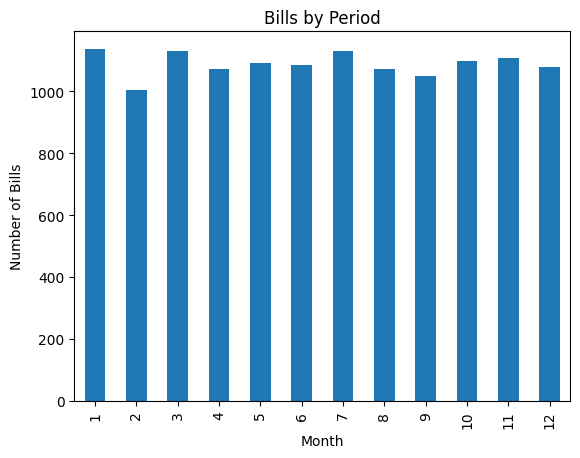

In [73]:
bill_by_period = df.groupby(['Month'])['Receipt_Number'].nunique()
bill_by_period.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Bills')
plt.title('Bills by Period')
plt.show()


Робимо висновок, що найбільш пікові місяці - січень, березень та липень, найменша кількість покупок - у лютому. Ці дані можна брати до уваги при формуванні промоакцій, спеціальних пропозицій від брендів і т.д.

2.Визначимо кількість чеків по країнах, де представлені магазини

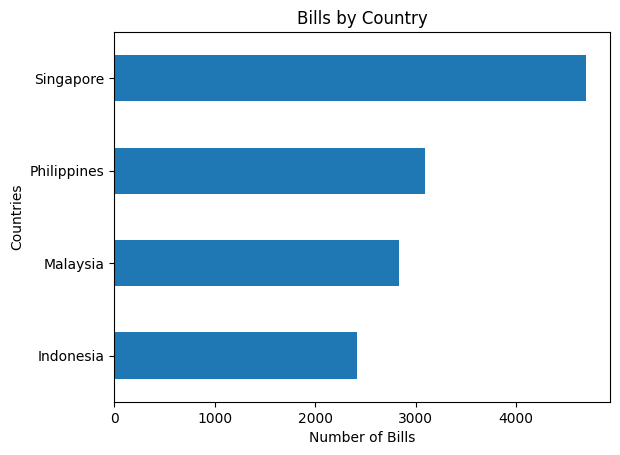

In [74]:
bill_by_country = df.groupby(['Country'])['Receipt_Number'].nunique()
bill_by_country.plot(kind='barh')
plt.xlabel('Number of Bills')
plt.ylabel('Countries')
plt.title('Bills by Country')
plt.show()

#

Бачимо, що найбільше покупок роблять у магазинах в Сінгапурі, найменше - у магазинах Індонезії. Ці дані можуть використовуватися при логістичному плануванні, а також при планах на масштабування мережі.

3.Визначимо розмір чеків помісячно в розрізі країн

Text(0.5, 1.0, 'Графік розмірів чеків помісячно в залежності від країни')

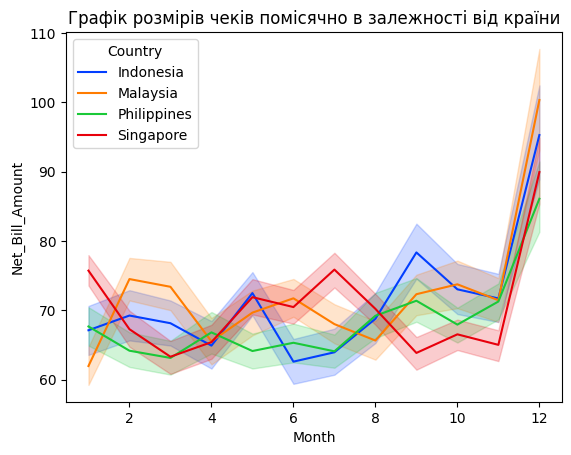

In [76]:
sns.lineplot(
    x='Month',
    y='Net_Bill_Amount', 
    data=df_clean,  palette='bright', hue='Country')
plt.xlabel(
    'Month')
plt.ylabel(
    'Net_Bill_Amount')
plt.title('Графік розмірів чеків помісячно в залежності від країни')

Ці дані можна використовувати для прогнозування доходу помісячно для кожного з філіалів

4.Дослідимо залежність між сумою за товар та його маржинальністю

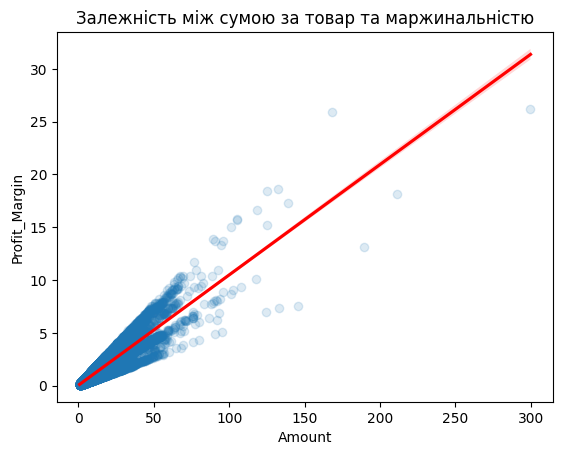

In [78]:
sns.regplot(data=df, x='Amount', y = 'Profit_Margin', line_kws={'color': 'red'}, scatter_kws={'alpha':0.15})
plt.xlabel('Amount')
plt.ylabel('Profit_Margin')
plt.title('Залежність між сумою за товар та маржинальністю')
plt.show()

Бачимо, що в основному попитом користуються товари, що мають низьку ціну та низьку маржу. В подальшому можна змоделювати, чи зможе збільшити дохід магазину додавання більшої кількості дорожчих товарів з більшою маржею.

5.Продовжимо дослідження середнього чеку по країнах, використовуючи скрипічну діаграму. Цей тип діаграми дозволяє візуалізувати медіанні значення та квартилі. 

Text(0.5, 1.0, 'Net_Bill_Amount by countries')

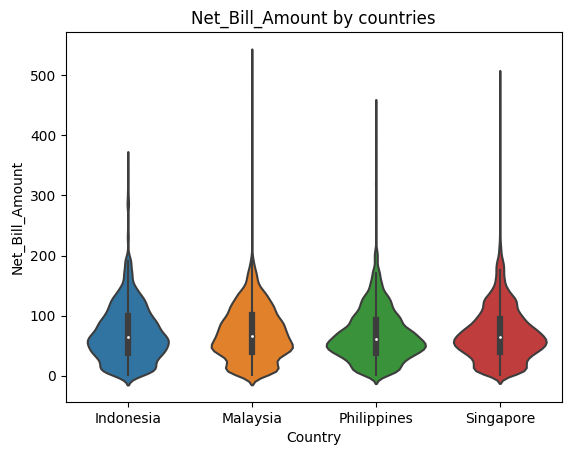

In [62]:
ax = sns.violinplot(x='Country', y='Net_Bill_Amount', data=df_clean)
ax.set_xlabel("Country")
ax.set_ylabel("Net_Bill_Amount")
ax.set_title("Net_Bill_Amount by countries")



Бачимо, що медіанні значення по країнах знаходяться практично на одному рівні. 

6.Проведемо аналіз використання типів оплати в залежності від країни

In [20]:
payment_mode = df.pivot_table(index=['Country'], columns = ['Payment_Mode'],  aggfunc='size')
payment_mode

Payment_Mode,Card,Cash,Wallet
Country,,,
Indonesia,2871,3211,3026
Malaysia,3872,3127,3764
Philippines,4186,4263,3931
Singapore,6220,5830,6146


<Axes: xlabel='Country'>

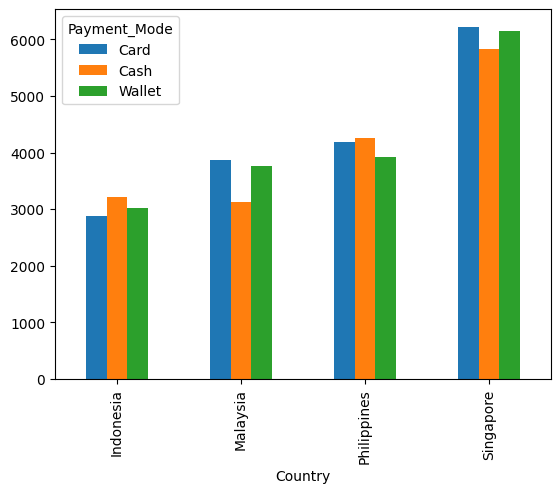

In [21]:
payment_mode.plot(kind = 'bar')

Бачимо, що ситуація щодо використання платіжних методів відрізняється - в Індонезії та на Філіпінах більше користуються готівкою, а в Малайзії та Сінгапурі - картою або електронними гаманцями. Скоріше за все це пов'язано з різним рівнем розвитку банківських систем у цих країнах. Але дану статистику необхідно враховувати при відкритті нових магазинів та модернізації вже існуючих. Наприклад, варто забезпечити всі каси терміналами для оплати картою у тих країнах, де більше безготівкових розрахунків 

In [ ]:
7.Дослідження покупців в рамках гендеру

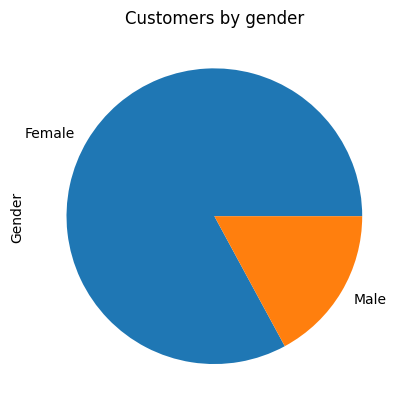

In [68]:
df['Gender'].value_counts().plot(kind='pie')
plt.title('Customers by gender')
plt.show()

Інформацію щодо гендеру можна використовувати при формуванні акційних пропозицій та маркетингу загалом. На чоловіків та жінок діють абсолютно різні маркетингові прийоми, загалом вважається, що жінки більше схильні до імпульсивних покупок. 

8.Визначення топ-10 брендів за Amount

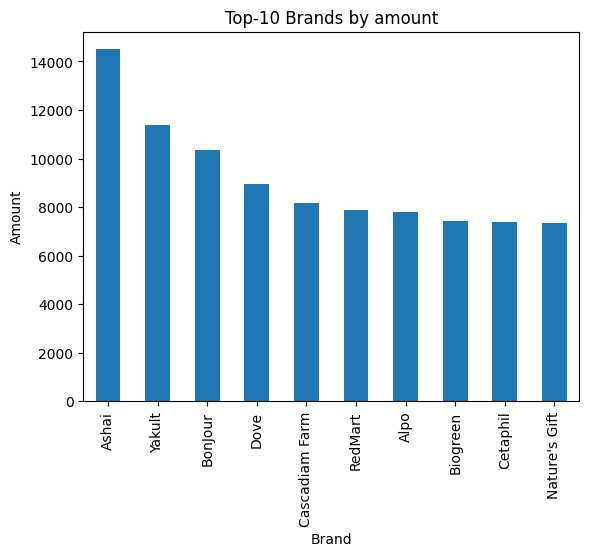

In [67]:
brand_sum = df.groupby('Brand')['Amount'].sum()
brand_sum = brand_sum.nlargest(10)
brand_sum.plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Amount')
plt.title('Top-10 Brands by amount')
plt.show()

Цей репорт дає розуміння, співпраця з якими брендами є для нас найбільш цінною, а отже можливо необхідно розширювати лінійку товарів цих брендів чи домовлятися з ними на співпрацю на більш вигідних умовах

9.Визначення топ-10 клієнтів за кількістю покупок (чеків)

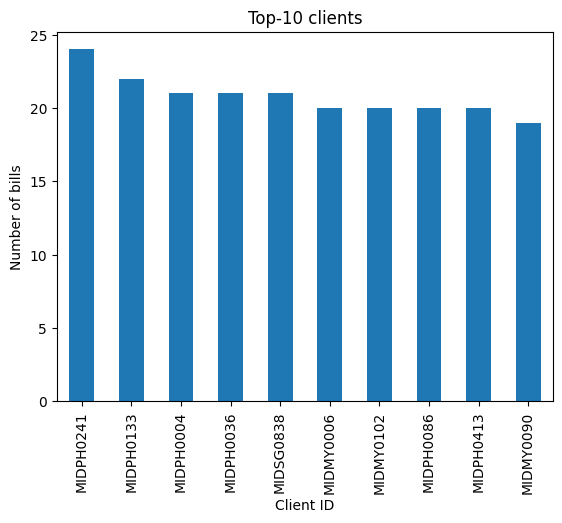

In [71]:
top_client = df.groupby(['Membership_ID'])['Receipt_Number'].nunique()
top_client = top_client.nlargest(10)
top_client.plot(kind='bar')
plt.xlabel('Client ID')
plt.xticks(rotation = 'vertical')
plt.ylabel('Number of bills')
plt.title('Top-10 clients')
plt.show()

Цей репорт дає нам список найбільш лояльних клієнтів. Ми можемо розіслати цим клієнтам опитування, як нам стати краще і таким чином зібрати цінний фідбек. 

10.Визначимо, які категорії товарів продаються найбільше (по кількості) і на найбільшу суму. 

In [93]:
popular_by_category = pd.pivot_table(df, index = ['Category'], values = ['QTY', 'Amount'], aggfunc='sum')
popular_by_category.sort_values(by='Amount', ascending=False)

,Amount,QTY
Category,,
Beauty,79185.5923,8089
Frozen,74296.7194,9907
Bakery & Breakfast,53162.5921,10526
Meat & Seafood,38975.0958,3369
Fruit & Vegetable,36783.0941,6815
Mother & Baby,36549.9824,3154
Pet Care,35699.7611,5272
"Dairy, Chilled & Eggs",35460.4534,5292
"Wines, Beers & Spirits",34641.1768,2656


Text(0.5, 1.0, 'Amount and quantity by categories')

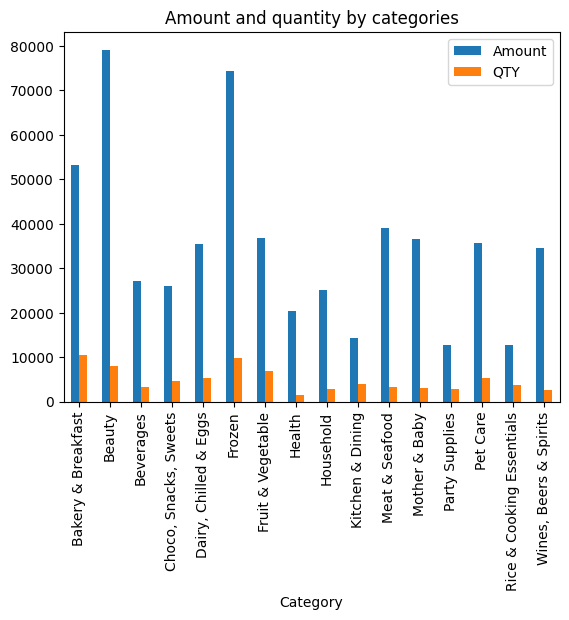

In [95]:
popular_by_category.plot(kind = 'bar')
plt.title('Amount and quantity by categories')

Цей репорт дає розуміння, які категорії товарів більше користуються попитом, тобто відповідає на питання, за чим зазвичай покупці йдуть до нас в магазин і які товари генерують найбільшу суму продажів. Подальший аналіз може повпливати на маркетингові рішення чи збільшити/зменшити кількість товарів певних категорій. 

11.Знайдемо 10 найбільш популярних товарів та 10 товарів, що продаються на найбільшу суму. Визначимо, чи перетинаються ці 2 списки. 

In [49]:
most_popular_item = df.groupby('Items')['QTY'].count()
most_popular_item = most_popular_item.nlargest(10)
most_popular_item.to_frame()
max_amount_item = df.groupby('Items')['Amount'].sum()
max_amount_item = max_amount_item.nlargest(10)
max_amount_item.to_frame()
popular_item_table = pd.merge(most_popular_item, max_amount_item, on='Items')
display(popular_item_table)

,QTY,Amount
Items,,
Sainsbury salted tortilla chips,849,7277.1478
Ashai Lager Beer,813,14500.2963
Nutro Beef with vegetables dog food,646,7262.0028
Fresh Soyamilk,628,11242.1521
Original wholemeal bread,610,6942.7116
3 in 1 cereal drink original,518,6703.2294


Text(0.5, 1.0, 'Amount and quantity by most popular items')

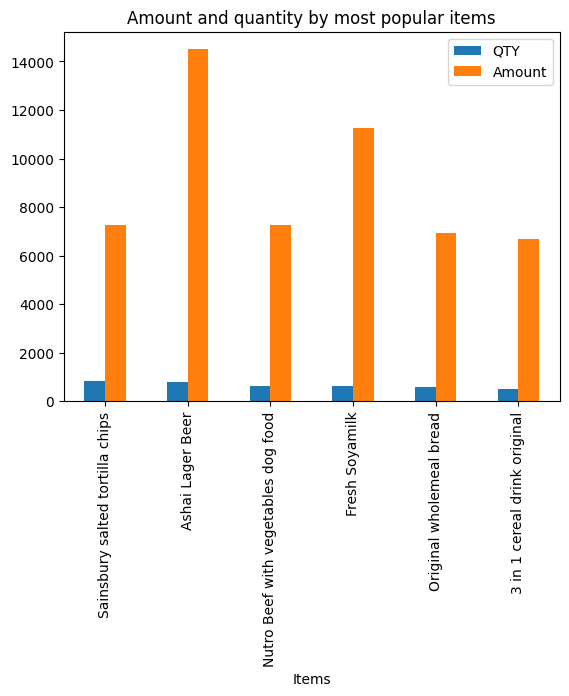

In [74]:
popular_item_table.plot(kind='bar')
plt.title('Amount and quantity by most popular items')

Цей репорт дає розуміння, які саме товари більше користуються попитом і генерують найбільшу суму продажів. Ми маємо забезпечувати постійну наявність цих товарів та можливо продумувати механізми, як змусити покупця купити суміжні товари до найбільш популярних. Поряд з популярними товарами варто розміщувати ті, продажі по яких хотілося б збільшити. 

12.Визначимо середній чек по країнах. Порівняємо значення для країни з найбільшим показником із середнім показником по всій вибірці. Порівняємо, чи є різниця статистично значимою. 

In [60]:
mean_bill = df_clean['Net_Bill_Amount'].mean()
print('Cередній чек загалом по мережі-', round(mean_bill,2))
round(df_clean.groupby(['Country'])['Net_Bill_Amount'].mean(),2)

Cередній чек загалом по мережі- 70.6


Country
Indonesia      71.47
Malaysia       72.21
Philippines    68.39
Singapore      70.69
Name: Net_Bill_Amount, dtype: float64

Визначимо, чи є розподіл нормальним, провівши QQ-тест. 

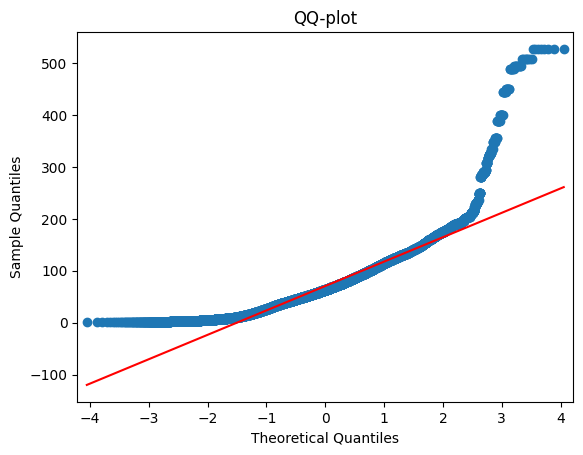

In [65]:
data_stat = df_clean['Net_Bill_Amount']
fig = sm.qqplot(data_stat, line='s')
plt.title('QQ-plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

Так як дані QQ-тесту є неоднозначними (маємо багато викидів), то проведемо тест Шапіро-Вілка.

In [66]:
shapiro_test = st.shapiro(data_stat)
alpha = 0.05
if shapiro_test.pvalue <= alpha:
    print(f"Розподіл не є нормальним, p = {shapiro_test.pvalue}")
else:
    print(f"Розподіл є нормальним,  p = {shapiro_test.pvalue}")


Розподіл не є нормальним, p = 0.0


Тест Шапіро-Вілка показав, що розподіл не є нормальним, тому для порівняння, чи є різниця між середнім чеком для Малайзії і загальним середнім чеком по мережі статистично значимою, використаємо t-test.

In [75]:
#визначено, що найбільшим є середній чек в Малайзії, тому його значення підставляємо як mu=
"H0 - середній чек для Малайзії такий самий,як і для інших країн. H1 - середній чек для Малайзії вищий"

std = np.std(df_clean['Net_Bill_Amount'])
mu = 72.20
sample_mean = np.mean(df_clean['Net_Bill_Amount'])
print('mean=%.2f std=%.2f' % (sample_mean, np.std(df_clean['Net_Bill_Amount'])))

ttest_Score, p_value = ttest_1samp(df_clean['Net_Bill_Amount'], mu)

print('ttest_Score=%.4f p_value=%.2f' % (ttest_Score, p_value))

alpha = 0.05
if p_value <= alpha and ttest_Score > 0:
    print("Відхиляємо H0. Середній чек для Малайзії вищий, ніж загалом")
else:
    print("Не відхиляємо H0. Різниця між середнім чеком для Малайзії та чеком по мережі не є статистично значимою")

mean=70.60 std=47.04
ttest_Score=-6.7683 p_value=0.00
Не відхиляємо H0. Різниця між середнім чеком для Малайзії та чеком по мережі не є статистично значимою


Як показав тест, різниця між середнім чеком для Малайзії і середнім чеком по мережі не є статистично значимою. 